# News Data Sentiment Analysis using VADER and TextBlob
<p>There are two types of sentiment analyzing approcahes - Polarity and Valence based.</p>
<p>Valence based approach taken into consideration the "intensity" of a word as opposed to only the polarity (+ve or -ve). For ex. "Great" is more treated as more +ve as opposed to "Good".</p>
<p>Sentiment analysis is a perfect approach to sieve and respond to unstructured data - social media, product reviews, etc.</p>
</ol>

# Importing Libraries and Data Loading

In [1]:
import pandas as pd
import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
nltk.download('wordnet2022')
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


cp: cannot stat '/usr/share/nltk_data/corpora/wordnet2022': No such file or directory


In [2]:
df = pd.read_csv('Bitcoin News Final.csv')

In [3]:
df.shape

(6601, 2)

In [4]:
df.columns

Index(['Date', 'Body'], dtype='object')

In [5]:
df.head()

,Date,Body
0,6/23/2020,Bitcoin’s price action has been incredibly lac...
1,6/23/2020,"The United States is in turmoil, and the dolla..."
2,6/23/2020,An over 300 million active register accounts o...
3,6/24/2020,Bitcoin started a downside correction from the...
4,6/24/2020,"Throughout 2017 and 2018, many altcoin-advocat..."


In [6]:
df.tail()

,Date,Body
6596,11/15/2022,The hardware wallet firm is certain that the l...
6597,11/15/2022,Sale price versus price paid diverges the most...
6598,11/15/2022,Bitcoin and crypto investors are becoming incr...
6599,11/15/2022,"On November 15,Â\xa0BitcoinÂ\xa0bounced off a ..."
6600,11/15/2022,On Monday Edward Snowden tweeted 'for the firs...


In [7]:
import pandas as pd

# Convert the 'Date' column to datetime format and infer the format automatically
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Define the start and end dates for the range
start_date = '2021-02-05'
end_date = '2022-06-30'

# Filter the DataFrame based on the date range
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


<ipython-input-7-c41df3abbd8d>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [8]:
df.head(5)

,Date,Body
899,2021-02-05,An analyst expects DeFi tokens to mimic bitcoi...
900,2021-02-05,Bitfinex exchange’s parent company iFinex Inc....
901,2021-02-05,DeFi and the prospect of trading futures have ...
902,2021-02-06,More than 53 blockchain projects have emerged ...
903,2021-02-08,The highest yielding pool on Sushiswap leverag...


# Text Preprocessing


In [9]:
# Dictionary of common English contractions
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def contx_to_exp(text):
  for key in apostrophe_dict:
    value = apostrophe_dict[key]
    text = text.replace(key, value)
    return text

In [10]:
# Emotion detection by different symbols
emotion_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

def emotion_check(text):
  for key in emotion_dict:
    value = emotion_dict[key]
    text = text.replace(key, value)
    return text

In [11]:
import re
def clean_text(text):
  text = re.sub(r'https?:\/\/\S*'," ", text) # Removing the url from the text
  text = re.sub(r'@\S+', " ", text) # Removing handles from the text
  text = re.sub('#'," ", text) # removing # from the data
  text = re.sub(r'RT', "", text) # Removing the Re-tweet mark
  text = re.sub(r"\s+"," ", text)  # Removing Extra Spaces
  text = text.lower()
  return text

#removes pattern in the input text
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt.lower()

In [12]:
# Define a regular expression pattern to match handles
pattern = r'@[\w]+'

# Apply the remove_pattern function to the 'text' column using apply
df['cleaned_text'] = df['Body'].apply(lambda x: remove_pattern(x, pattern))

In [13]:
df.head()

,Date,Body,cleaned_text
899,2021-02-05,An analyst expects DeFi tokens to mimic bitcoi...,an analyst expects defi tokens to mimic bitcoi...
900,2021-02-05,Bitfinex exchange’s parent company iFinex Inc....,bitfinex exchange’s parent company ifinex inc....
901,2021-02-05,DeFi and the prospect of trading futures have ...,defi and the prospect of trading futures have ...
902,2021-02-06,More than 53 blockchain projects have emerged ...,more than 53 blockchain projects have emerged ...
903,2021-02-08,The highest yielding pool on Sushiswap leverag...,the highest yielding pool on sushiswap leverag...


In [14]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to perform text preprocessing
def preprocess_text(text):

    text = clean_text(text)

    # Convert contractions to expansions
    text = contx_to_exp(text)

    # Perform emotion check
    text = emotion_check(text)

    # Remove special characters, numbers, and punctuations
    text = re.sub("[^a-zA-Z]", " ", text)

    # Remove short words
    text = " ".join([w for w in text.split() if len(w) > 3])

    # Remove stopwords
    text_tokens = word_tokenize(text)
    text = " ".join([word for word in text_tokens if word.lower() not in stop_words])

    # Remove everything other than text
    text = re.sub(r'[^\w\s]', ' ', text)  # Replacing Punctuations with space
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Replacing all the things with space other than text
    text = re.sub(r"\s+", " ", text)  # Removing extra spaces

    return text

# Apply the preprocessing function to the 'clean_text' column
df['cleaned_text'] = df['cleaned_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We tried Stemming and Lematization but the results we are not applying them on our dataset.

    """
    The general rule for whether to lemmatize is unsurprising: if it does not improve performance, do not lemmatize.
    Not lemmatizing is the conservative approach, and should be favored unless there is a significant performance gain.
    For example, a popular sentiment analysis method, VADER, has different ratings depending on the form of the word and therefore
    the input should not be stemmed or lemmatized.
    """:

In [15]:
# #stem the words
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer
# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

In [16]:
# #individual words as tokens
# tokenized_body = df['Body'].apply(lambda x: x.split())

# # tokenized_body = tokenized_body.apply(lambda sentence: [lemmatizer.lemmatize(stemmer.stem(word)) for word in sentence])

# # Apply join function to each element in tokenized_body
# tokenized_body = tokenized_body.apply(lambda sentence: " ".join(sentence))

# # Assign the result back to the DataFrame column
# df['cleaned_text'] = tokenized_body

# Exploratory Data Analysis (EDA)

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

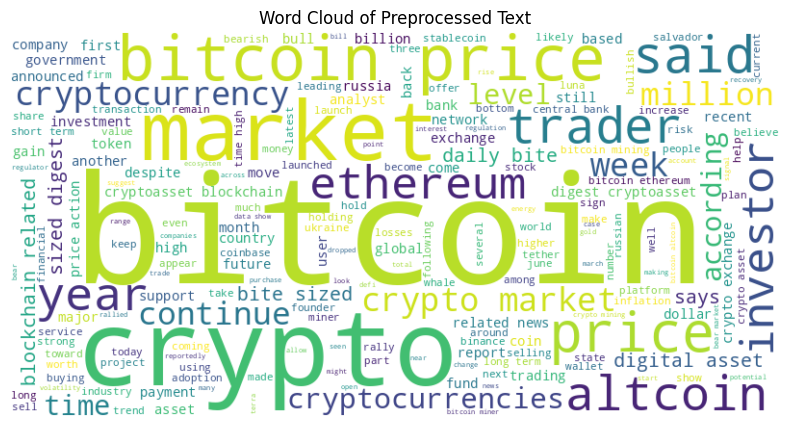

In [18]:
# Concatenate all preprocessed text into a single string
all_text = ' '.join(df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Text')
plt.show()

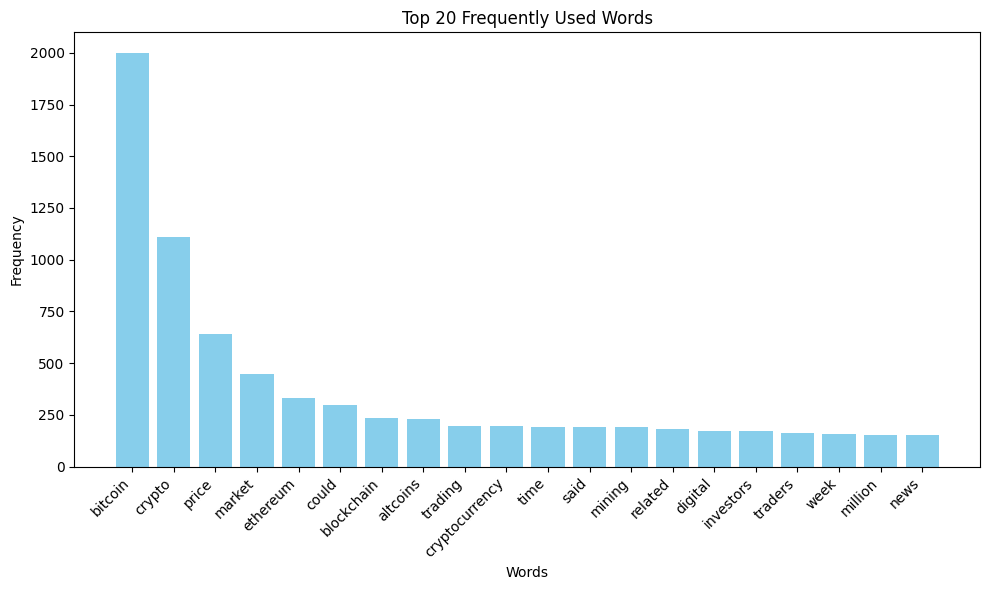

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize


# Tokenize the clean text
tokenized_text = [word for sublist in df['cleaned_text'].apply(word_tokenize) for word in sublist]

# Count the frequency of each word
word_freq = Counter(tokenized_text)

# Get the top 20 words
top_words = word_freq.most_common(20)

# Extract words and their frequencies
words, freqs = zip(*top_words)

# Plot the top 20 words
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Frequently Used Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vader Polarity Scores

VADER is a VALENCE based sentiment analyzer.

In [20]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [21]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores using Vader
def get_sentiment_scores(text):
    # Get sentiment scores
    scores = analyzer.polarity_scores(text)
    return pd.Series([scores['neg'], scores['pos'], scores['neu'], scores['compound']])

# Apply Vader sentiment analysis to the preprocessed text
df[['negative_score', 'positive_score', 'neutral_score', 'compound_score']] = df['cleaned_text'].apply(get_sentiment_scores)

# Display the updated DataFrame
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


          Date                                               Body  \
899 2021-02-05  An analyst expects DeFi tokens to mimic bitcoi...   
900 2021-02-05  Bitfinex exchange’s parent company iFinex Inc....   
901 2021-02-05  DeFi and the prospect of trading futures have ...   
902 2021-02-06  More than 53 blockchain projects have emerged ...   
903 2021-02-08  The highest yielding pool on Sushiswap leverag...   

                                          cleaned_text  negative_score  \
899  analyst expects defi tokens mimic bitcoin bull...           0.000   
900  bitfinex exchange parent company ifinex made f...           0.115   
901  defi prospect trading futures crypto investors...           0.000   
902  blockchain projects emerged multi billion doll...           0.000   
903  highest yielding pool sushiswap leverages extr...           0.000   

     positive_score  neutral_score  compound_score  
899           0.000          1.000          0.0000  
900           0.000          0.885

In [22]:
df.head(5)

,Date,Body,cleaned_text,negative_score,positive_score,neutral_score,compound_score
899,2021-02-05,An analyst expects DeFi tokens to mimic bitcoi...,analyst expects defi tokens mimic bitcoin bull...,0.000,0.000,1.000,0.0000
900,2021-02-05,Bitfinex exchange’s parent company iFinex Inc....,bitfinex exchange parent company ifinex made f...,0.115,0.000,0.885,-0.4588
901,2021-02-05,DeFi and the prospect of trading futures have ...,defi prospect trading futures crypto investors...,0.000,0.268,0.732,0.2960
902,2021-02-06,More than 53 blockchain projects have emerged ...,blockchain projects emerged multi billion doll...,0.000,0.000,1.000,0.0000
903,2021-02-08,The highest yielding pool on Sushiswap leverag...,highest yielding pool sushiswap leverages extr...,0.000,0.181,0.819,0.7351


# TextBlob Sentiment Analysis

TextBlob is a Valence based Sentiment Analyzer

In [23]:
from textblob import TextBlob

# Function to get sentiment scores using TextBlob
def get_textblob_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get sentiment scores
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    return pd.Series([polarity, subjectivity])

# Apply TextBlob sentiment analysis to the preprocessed text
df[['textblob_polarity', 'textblob_subjectivity']] = df['cleaned_text'].apply(get_textblob_sentiment)

# Display the updated DataFrame
print(df.head())

          Date                                               Body  \
899 2021-02-05  An analyst expects DeFi tokens to mimic bitcoi...   
900 2021-02-05  Bitfinex exchange’s parent company iFinex Inc....   
901 2021-02-05  DeFi and the prospect of trading futures have ...   
902 2021-02-06  More than 53 blockchain projects have emerged ...   
903 2021-02-08  The highest yielding pool on Sushiswap leverag...   

                                          cleaned_text  negative_score  \
899  analyst expects defi tokens mimic bitcoin bull...           0.000   
900  bitfinex exchange parent company ifinex made f...           0.115   
901  defi prospect trading futures crypto investors...           0.000   
902  blockchain projects emerged multi billion doll...           0.000   
903  highest yielding pool sushiswap leverages extr...           0.000   

     positive_score  neutral_score  compound_score  textblob_polarity  \
899           0.000          1.000          0.0000               0.

# Removing Columns and Finalizing Resultant Dataframe

In [24]:
df.columns

Index(['Date', 'Body', 'cleaned_text', 'negative_score', 'positive_score',
       'neutral_score', 'compound_score', 'textblob_polarity',
       'textblob_subjectivity'],
      dtype='object')

In [25]:
df.drop(['Body', 'cleaned_text'], axis=1, inplace=True)

In [26]:
df.head()

,Date,negative_score,positive_score,neutral_score,compound_score,textblob_polarity,textblob_subjectivity
899,2021-02-05,0.000,0.000,1.000,0.0000,0.00,0.00
900,2021-02-05,0.115,0.000,0.885,-0.4588,0.35,0.55
901,2021-02-05,0.000,0.268,0.732,0.2960,0.00,0.00
902,2021-02-06,0.000,0.000,1.000,0.0000,0.00,0.00
903,2021-02-08,0.000,0.181,0.819,0.7351,0.00,0.10


In [27]:
df = df.rename(columns={
    'negative_score': 'VADER Negative Score',
    'positive_score': 'VADER Positive Score',
    'neutral_score': 'VADER Neutral Score',
    'compound_score': 'VADER Compound Score',
    'textblob_polarity': 'TextBlob Polarity',
    'textblob_subjectivity': 'TextBlob Subjectivity'
})

In [28]:
df.head()

,Date,VADER Negative Score,VADER Positive Score,VADER Neutral Score,VADER Compound Score,TextBlob Polarity,TextBlob Subjectivity
899,2021-02-05,0.000,0.000,1.000,0.0000,0.00,0.00
900,2021-02-05,0.115,0.000,0.885,-0.4588,0.35,0.55
901,2021-02-05,0.000,0.268,0.732,0.2960,0.00,0.00
902,2021-02-06,0.000,0.000,1.000,0.0000,0.00,0.00
903,2021-02-08,0.000,0.181,0.819,0.7351,0.00,0.10


In [29]:
News = df

In [30]:
import pandas as pd

# Define the expected date range (e.g., from 'start_date' to 'end_date')
start_date = '2021-02-05'
end_date = '2022-06-30'
expected_dates = pd.date_range(start=start_date, end=end_date)

# Find missing dates by comparing expected dates with actual dates
missing_dates = expected_dates[~expected_dates.isin(News['Date'])]

# Number of missing dates
num_missing_dates = len(missing_dates)

# List of missing dates
list_missing_dates = missing_dates.strftime('%Y-%m-%d').tolist()

print("Number of missing dates:", num_missing_dates)
print("List of missing dates:", list_missing_dates)

Number of missing dates: 97
List of missing dates: ['2021-02-07', '2021-02-09', '2021-02-12', '2021-02-13', '2021-02-16', '2021-02-22', '2021-02-24', '2021-02-26', '2021-03-05', '2021-03-06', '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-18', '2021-03-20', '2021-03-21', '2021-03-22', '2021-03-27', '2021-04-05', '2021-04-07', '2021-04-11', '2021-04-15', '2021-04-17', '2021-04-23', '2021-04-27', '2021-05-02', '2021-05-05', '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-15', '2021-05-17', '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-24', '2021-05-25', '2021-05-28', '2021-05-31', '2021-06-01', '2021-06-20', '2021-06-24', '2021-06-25', '2021-06-27', '2021-07-01', '2021-07-08', '2021-07-09', '2021-07-13', '2021-07-14', '2021-07-17', '2021-07-20', '2021-07-21', '2021-07-23', '2021-07-28', '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01', '2021-08-02', '2021-08-08', '2021-08-10', '2021-08-13', '2021-08-15', '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-21', '2021-08-2

In [31]:
# Put the 'Date' column into a set
date_set = set(News['Date'])

# Check the length of the set
num_unique_dates = len(date_set)

print("Number of unique dates in the 'Date' column:", num_unique_dates)

Number of unique dates in the 'Date' column: 414


Choosing the News Row with max magnitude of VADER Compound Score for Dates with Multiple News

In [32]:
# Calculate the absolute value of VADER Compound Score
News['Abs_VADER_Compound_Score'] = News['VADER Compound Score'].abs()

# Find the row index with maximum absolute VADER Compound Score for each date
max_abs_compound_rows_idx = News.groupby('Date')['Abs_VADER_Compound_Score'].idxmax()

# Select rows with maximum absolute VADER Compound Score for each date
News = News.loc[max_abs_compound_rows_idx]

# Drop the temporary column
News.drop('Abs_VADER_Compound_Score', axis=1, inplace=True)

# Print the updated DataFrame
(News.head())

,Date,VADER Negative Score,VADER Positive Score,VADER Neutral Score,VADER Compound Score,TextBlob Polarity,TextBlob Subjectivity
900,2021-02-05,0.115,0.000,0.885,-0.4588,0.35000,0.55
902,2021-02-06,0.000,0.000,1.000,0.0000,0.00000,0.00
903,2021-02-08,0.000,0.181,0.819,0.7351,0.00000,0.10
906,2021-02-10,0.000,0.487,0.513,0.7650,0.13125,0.50
908,2021-02-11,0.000,0.307,0.693,0.7506,0.28750,0.50


Dropping Unnecessary Columns

In [33]:
News = News.drop(columns=['VADER Negative Score','VADER Positive Score', 'VADER Neutral Score'])

In [34]:
News.head()

,Date,VADER Compound Score,TextBlob Polarity,TextBlob Subjectivity
900,2021-02-05,-0.4588,0.35000,0.55
902,2021-02-06,0.0000,0.00000,0.00
903,2021-02-08,0.7351,0.00000,0.10
906,2021-02-10,0.7650,0.13125,0.50
908,2021-02-11,0.7506,0.28750,0.50


# Handling Missing Values and Normalization

In [35]:
import pandas as pd
import numpy as np


# Create a new DataFrame to store the filled rows
filled_df = pd.DataFrame(columns=News.columns)

# Iterate through each date in the range from the minimum to maximum date in your dataset
for date in pd.date_range(start='2021-02-05', end='2022-06-30'):
    # Check if the date is missing in the original DataFrame
    if date not in News['Date'].values:
        # Find the nearest available rows within a 5-day window
        nearest_rows = News[(News['Date'] >= date - pd.Timedelta(days=5)) &
                                 (News['Date'] <= date + pd.Timedelta(days=5))]

        # Calculate the weighted average for each numeric column using a 5-day window
        weighted_avg_values = nearest_rows.mean().values

        # Set the date in the first column
        weighted_avg_values[0] = date

        # Create a DataFrame for the weighted average values
        weighted_avg_df = pd.DataFrame([weighted_avg_values], columns=News.columns)

        # Append the filled row to the new DataFrame
        filled_df = pd.concat([filled_df, weighted_avg_df], ignore_index=True)

# Sort the DataFrame by date
filled_df = filled_df.sort_values(by='Date').reset_index(drop=True)

# Print the filled DataFrame
(filled_df)

,Date,VADER Compound Score,TextBlob Polarity,TextBlob Subjectivity
0,2021-02-07,0.358380,0.153750,0.330000
1,2021-02-09,0.452750,0.146644,0.344444
2,2021-02-12,0.688217,0.113310,0.427778
3,2021-02-13,0.641500,0.132837,0.430952
4,2021-02-16,0.588700,0.253819,0.548090
...,...,...,...,...
92,2021-12-12,0.247340,0.130920,0.319628
93,2021-12-19,0.172790,0.074623,0.294468
94,2021-12-26,0.406590,0.188561,0.321022
95,2022-01-01,0.696956,0.137870,0.300410


In [36]:
News = pd.concat([News, filled_df], ignore_index=True)

# Sort the combined DataFrame by date
News = News.sort_values(by='Date').reset_index(drop=True)

# Print the combined DataFrame
print(News)

          Date  VADER Compound Score  TextBlob Polarity  TextBlob Subjectivity
0   2021-02-05              -0.45880           0.350000               0.550000
1   2021-02-06               0.00000           0.000000               0.000000
2   2021-02-07               0.35838           0.153750               0.330000
3   2021-02-08               0.73510           0.000000               0.100000
4   2021-02-09               0.45275           0.146644               0.344444
..         ...                   ...                ...                    ...
506 2022-06-26               0.58590          -0.110000               0.356667
507 2022-06-27               0.65970           0.252381               0.323810
508 2022-06-28               0.75060           0.300000               0.455556
509 2022-06-29              -0.84810          -0.500000               1.000000
510 2022-06-30              -0.71840           0.111111               0.322222

[511 rows x 4 columns]


In [37]:
News.head()

,Date,VADER Compound Score,TextBlob Polarity,TextBlob Subjectivity
0,2021-02-05,-0.45880,0.350000,0.550000
1,2021-02-06,0.00000,0.000000,0.000000
2,2021-02-07,0.35838,0.153750,0.330000
3,2021-02-08,0.73510,0.000000,0.100000
4,2021-02-09,0.45275,0.146644,0.344444


Taking New DF and Shifting Axis to Normalize Values for Sentiment Values

In [38]:
#Mean Values
mean_compound = News['VADER Compound Score'].mean()
mean_polarity = News['TextBlob Polarity'].mean()

In [39]:
News['VADER Compound Score'] = News['VADER Compound Score'] - mean_compound
News['TextBlob Polarity'] = News['TextBlob Polarity'] - mean_polarity

Normalizing for Neutral Values

In [40]:
pos_mean_compound = 0;
count_pos_compound = 0;
count_neg_compound = 0;
neg_mean_compound = 0;
for i in range(0,len(News)):
    val = News['VADER Compound Score'].iloc[i]
    if(val>0):
        pos_mean_compound += val
        count_pos_compound += 1
    else:
        neg_mean_compound += val
        count_neg_compound += 1
pos_mean_compound = pos_mean_compound/count_pos_compound
neg_mean_compound = neg_mean_compound/count_neg_compound

In [41]:
pos_mean_polarity = 0;
count_pos_polarity = 0;
count_neg_polarity = 0;
neg_mean_polarity = 0;
for i in range(0,len(News)):
    val = News['TextBlob Polarity'].iloc[i]
    if(val>0):
        pos_mean_polarity += val
        count_pos_polarity += 1
    else:
        neg_mean_polarity += val
        count_neg_polarity += 1
pos_mean_polarity = pos_mean_polarity/count_pos_polarity
neg_mean_polarity = neg_mean_polarity/count_neg_polarity

In [42]:
for i in range(0,len(News)):
    val = News['VADER Compound Score'].iloc[i]
    if(val>=neg_mean_compound and val<=pos_mean_compound):
        News['VADER Compound Score'].iloc[i] = 0

<ipython-input-42-bc1b32a9d405>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  News['VADER Compound Score'].iloc[i] = 0
<ipython-input-42-bc1b32a9d405>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  News['VADER Compound Score'].iloc[i] = 0
<ipython-input-42-bc1b32a9d405>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  News['VADER Compound Score'].iloc[i] = 0
<ipython-input-42-bc1b32a9d405>:4: SettingWithCopyWarning: 
A value is tr

In [43]:
for i in range(0,len(News)):
    val = News['TextBlob Polarity'].iloc[i]
    if(val>=neg_mean_polarity and val<=pos_mean_polarity):
        News['TextBlob Polarity'].iloc[i] = 0

<ipython-input-43-c58b60775415>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  News['TextBlob Polarity'].iloc[i] = 0
<ipython-input-43-c58b60775415>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  News['TextBlob Polarity'].iloc[i] = 0
<ipython-input-43-c58b60775415>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  News['TextBlob Polarity'].iloc[i] = 0
<ipython-input-43-c58b60775415>:4: SettingWithCopyWarning: 
A value is trying to b

# Taking the BTC Historical Price Data and Combining it with our Dataset

In [44]:
prices_df = pd.read_csv('BTC-USD.csv')

In [45]:
sentiments_df = News

In [46]:
prices_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [47]:
prices_df = pd.DataFrame(data=prices_df[['Date', 'Open','High','Low','Close','Volume']], columns=['Date','Open','High','Low','Close','Volume'])
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    511 non-null    object 
 1   Open    511 non-null    float64
 2   High    511 non-null    float64
 3   Low     511 non-null    float64
 4   Close   511 non-null    float64
 5   Volume  511 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 24.1+ KB


In [48]:
sentiments_df.columns

Index(['Date', 'VADER Compound Score', 'TextBlob Polarity',
       'TextBlob Subjectivity'],
      dtype='object')

In [49]:
import pandas as pd

# Select columns from the first DataFrame
df1_selected = sentiments_df[['TextBlob Polarity', 'TextBlob Subjectivity', 'VADER Compound Score']]

# Select columns from the second DataFrame
df2_selected = prices_df[['Date', 'Open', 'Close']]

In [50]:
# Merge the selected columns
final_df = pd.merge(df2_selected, df1_selected, left_index=True, right_index=True)

In [51]:
final_df.head()

,Date,Open,Close,TextBlob Polarity,TextBlob Subjectivity,VADER Compound Score
0,2021-02-06,38138.386719,39266.011719,0.256894,0.550000,-0.791826
1,2021-02-07,39250.191406,38903.441406,0.000000,0.000000,0.000000
2,2021-02-08,38886.828125,46196.464844,0.000000,0.330000,0.000000
3,2021-02-09,46184.992188,46481.105469,0.000000,0.100000,0.402074
4,2021-02-10,46469.761719,44918.183594,0.000000,0.344444,0.000000


Finding the Sentiment of News Data

In [52]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [53]:
# create a column to store the text sentiment
final_df['news_sentiment'] = final_df['VADER Compound Score'].apply(getSentiment)
final_df.head()

,Date,Open,Close,TextBlob Polarity,TextBlob Subjectivity,VADER Compound Score,news_sentiment
0,2021-02-06,38138.386719,39266.011719,0.256894,0.550000,-0.791826,negative
1,2021-02-07,39250.191406,38903.441406,0.000000,0.000000,0.000000,neutral
2,2021-02-08,38886.828125,46196.464844,0.000000,0.330000,0.000000,neutral
3,2021-02-09,46184.992188,46481.105469,0.000000,0.100000,0.402074,positive
4,2021-02-10,46469.761719,44918.183594,0.000000,0.344444,0.000000,neutral


In [54]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return 0 #negative
    elif score == 0:
        return 1  #neutral
    else:
        return 2 #positive

In [55]:
# create a column to store the text sentiment
final_df['news_sentiment_flag'] = final_df['VADER Compound Score'].apply(getSentiment)
final_df.head()

,Date,Open,Close,TextBlob Polarity,TextBlob Subjectivity,VADER Compound Score,news_sentiment,news_sentiment_flag
0,2021-02-06,38138.386719,39266.011719,0.256894,0.550000,-0.791826,negative,0
1,2021-02-07,39250.191406,38903.441406,0.000000,0.000000,0.000000,neutral,1
2,2021-02-08,38886.828125,46196.464844,0.000000,0.330000,0.000000,neutral,1
3,2021-02-09,46184.992188,46481.105469,0.000000,0.100000,0.402074,positive,2
4,2021-02-10,46469.761719,44918.183594,0.000000,0.344444,0.000000,neutral,1


In [56]:
# Finding the unique values in news_sentiment column
unique_values = final_df['news_sentiment'].unique()

# Display the unique values
print(unique_values)

['negative' 'neutral' 'positive']


In [57]:
# Finding count of unique values
unique_values_count = (final_df['news_sentiment'].value_counts())

# Display the count of unique values
print(unique_values_count)

news_sentiment
neutral     258
positive    171
negative     82
Name: count, dtype: int64


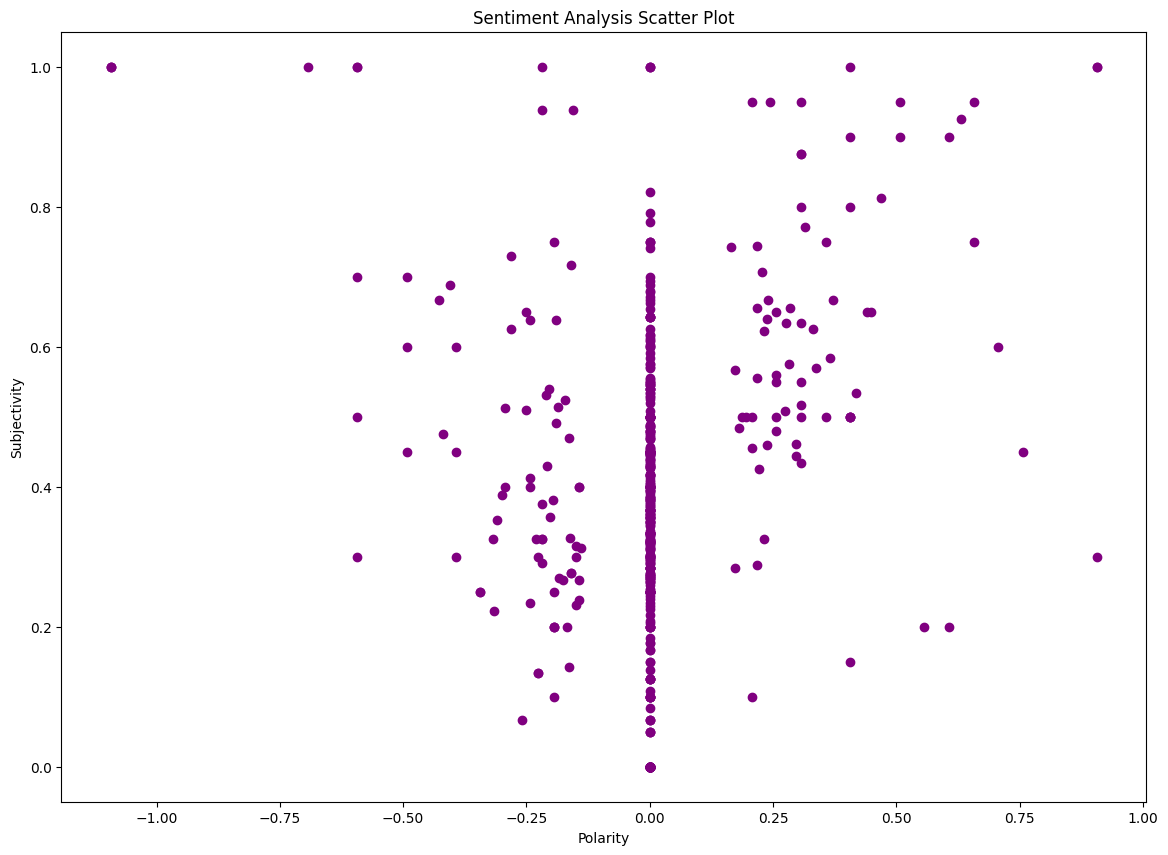

In [58]:
# scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(final_df.shape[0]):
    plt.scatter(final_df["TextBlob Polarity"].iloc[[i]].values[0], final_df["TextBlob Subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


# Scaling the Data

In [59]:
from sklearn.preprocessing import MinMaxScaler

data_to_scale = final_df[['Open', 'TextBlob Polarity', 'TextBlob Subjectivity', 'VADER Compound Score']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_to_scale)

#Change
scaler2 = MinMaxScaler()
final_df["y_scaled"] = scaler2.fit_transform(final_df[["Close"]])

# Replace the original columns with scaled values
final_df[['Open', 'TextBlob Polarity', 'TextBlob Subjectivity', 'VADER Compound Score']] = scaled_data

In [60]:
final_df.head()

,Date,Open,Close,TextBlob Polarity,TextBlob Subjectivity,VADER Compound Score,news_sentiment,news_sentiment_flag,y_scaled
0,2021-02-06,0.394066,39266.011719,0.675000,0.550000,0.261222,negative,0,0.417069
1,2021-02-07,0.416971,38903.441406,0.546553,0.000000,0.677907,neutral,1,0.409601
2,2021-02-08,0.409485,46196.464844,0.546553,0.330000,0.677907,neutral,1,0.559820
3,2021-02-09,0.559842,46481.105469,0.546553,0.100000,0.889491,positive,2,0.565683
4,2021-02-10,0.565709,44918.183594,0.546553,0.344444,0.677907,neutral,1,0.533491


# Model Training

In [61]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [62]:
# Split the data into training and testing sets
X = final_df[['Open', 'TextBlob Polarity', 'TextBlob Subjectivity', 'VADER Compound Score']]
# y = final_df['Close']
y = final_df[["y_scaled","Close"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Decision Tree Regression

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

tree_reg = DecisionTreeRegressor()

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [None, 3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(tree_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the grid search using training data
grid_search.fit(X_train, y_train["y_scaled"])

# Evaluate the best model on validation data
# val_score = grid_search.score(X_test, y_test["y_scaled"])

# Get the best model
best_tree_reg = grid_search.best_estimator_

# Print validation score
# print("Validation score:", val_score)
y_pred_train = best_tree_reg.predict(X_train)
# y_train_final = scaler2.inverse_transform([y_pred_train])

y_pred_test = best_tree_reg.predict(X_test)
y_pred_final = scaler2.inverse_transform([y_pred_test])

# mse_train_dt = mean_absolute_error(y_train["Close"].to_list(), y_pred_train[0])
mae_test_dt = mean_absolute_error(y_test["Close"].to_list(), y_pred_final[0])
print("Decision Tree Regressor Results")
print("-------------------------------------------------------------------------------------------")
print("Best parameters found:", grid_search.best_params_)
# print("Train MSE:", mae_train_dt)
print("Test MAE:", mae_test_dt)
print("-------------------------------------------------------------------------------------------")

Decision Tree Regressor Results
-------------------------------------------------------------------------------------------
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test MAE: 1333.379920980941
-------------------------------------------------------------------------------------------


<ipython-input-64-458b35ba86e1>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')


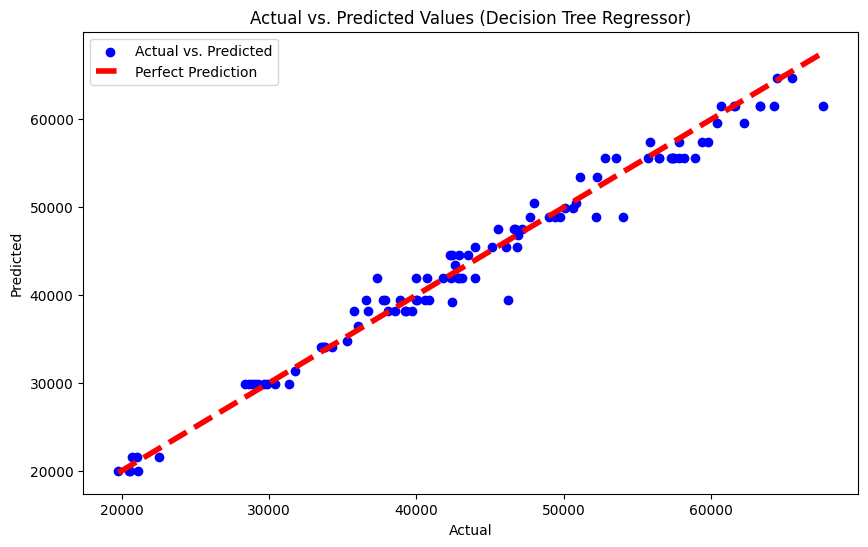

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test["Close"], y_pred_final[0], color='blue', label='Actual vs. Predicted')
plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Decision Tree Regressor)')
plt.legend()
plt.show()


In [65]:
# Print feature importances
feature_importances_dt = best_tree_reg.feature_importances_
print("Feature Importances(Decision Tree):")
for feature_name, importance in zip(X.columns, feature_importances_dt):
    print(f"{feature_name}: {importance}")

Feature Importances(Decision Tree):
Open: 0.9980964103989446
TextBlob Polarity: 0.000506730696171318
TextBlob Subjectivity: 0.0012038808052374742
VADER Compound Score: 0.00019297809964673233


## 2. Random Forest Regression

In [66]:
# Define the model
rf_reg = RandomForestRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [20, 30 ,50],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [12,10, 9,11],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train["y_scaled"])

# Get the best model
best_rf_reg = grid_search.best_estimator_

# Evaluate the model
# y_pred_train = best_rf_reg.predict(X_train)
y_pred_test = best_rf_reg.predict(X_test)
y_pred_final = scaler2.inverse_transform([y_pred_test])

# mse_train_rf = mean_squared_error(y_train, y_pred_train)
mae_test_rf = mean_absolute_error(y_test["Close"].to_list(), y_pred_final[0])
print("Random Forest Regressor Results")
print("-------------------------------------------------------------------------------------------")
print("Best parameters found:", grid_search.best_params_)
# print("Train MSE:", mse_train_rf)
print("Test MAE:", mae_test_rf)
print("-------------------------------------------------------------------------------------------")

Random Forest Regressor Results
-------------------------------------------------------------------------------------------
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 50}
Test MAE: 1244.628014984115
-------------------------------------------------------------------------------------------


<ipython-input-67-bb745c192f86>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')


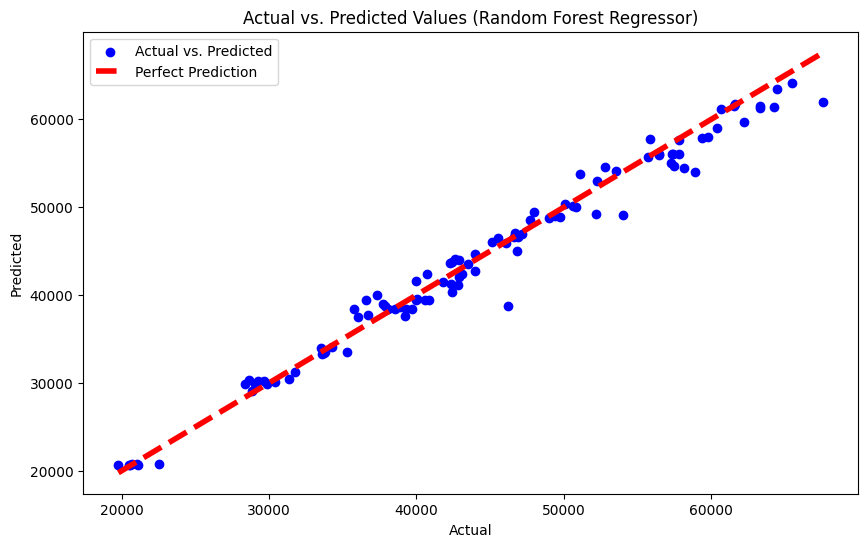

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test["Close"], y_pred_final[0], color='blue', label='Actual vs. Predicted')
plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.legend()
plt.show()

In [68]:
# Print feature importances
feature_importances_rf = best_rf_reg.feature_importances_
print("Feature Importances:")
for feature_name, importance in zip(X.columns, feature_importances_rf):
    print(f"{feature_name}: {importance}")

Feature Importances:
Open: 0.9948066366896503
TextBlob Polarity: 0.0012146210231161016
TextBlob Subjectivity: 0.002729883847460245
VADER Compound Score: 0.0012488584397733625


## 3. Gradient Boosting Regression

In [72]:
# Define the model
gb_reg = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [10,20,30,40],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(gb_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train["y_scaled"])

# Get the best model
best_gb_reg = grid_search.best_estimator_

# Evaluate the model
y_pred_train = best_gb_reg.predict(X_train)
y_pred_test = best_gb_reg.predict(X_test)
y_pred_final = scaler2.inverse_transform([y_pred_test])
# mse_train_gb = mean_squared_error(y_train, y_pred_train)
mae_test_gb = mean_absolute_error(y_test["Close"].to_list(), y_pred_final[0])
print("Gradient Boosting Regressor Results")
print("-------------------------------------------------------------------------------------------")
print("Best parameters found:", grid_search.best_params_)
# print("Train MAE:", mae_train_gb)
print("Test MAE:", mae_test_gb)
print("-------------------------------------------------------------------------------------------")

Gradient Boosting Regressor Results
-------------------------------------------------------------------------------------------
Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}
Test MAE: 1303.9252959246703
-------------------------------------------------------------------------------------------


<ipython-input-73-d3f09913fe76>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')


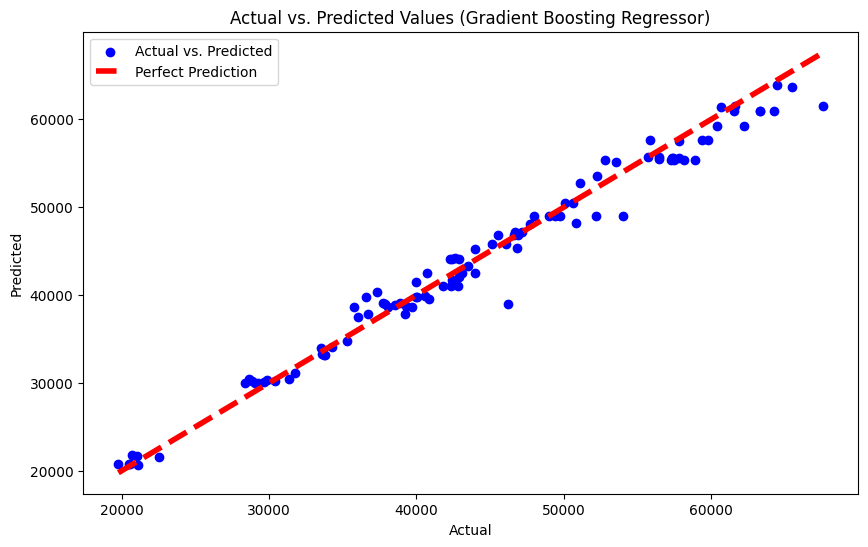

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test["Close"], y_pred_final[0], color='blue', label='Actual vs. Predicted')
plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')
plt.legend()
plt.show()

In [71]:
# Print feature importances
feature_importances_gb = best_gb_reg.feature_importances_
print("Feature Importances:")
for feature_name, importance in zip(X.columns, feature_importances_gb):
    print(f"{feature_name}: {importance}")

Feature Importances:
Open: 0.9975833251683658
TextBlob Polarity: 0.0009340007744393254
TextBlob Subjectivity: 0.0008006685035590894
VADER Compound Score: 0.0006820055536357271


## 4. XGBoost

In [74]:
# Define the XGBoost Regressor model
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80],
    'learning_rate': [0.1, 0.2,0.3,0.4,0.5,0.6],
    'max_depth': [3, 5, 7, 10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(xgb_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train["y_scaled"])

# Get the best model
best_xgb_reg = grid_search.best_estimator_

# Evaluate the model
# y_pred_train = best_xgb_reg.predict(X_train)
y_pred_test = best_xgb_reg.predict(X_test)
y_pred_final = scaler2.inverse_transform([y_pred_test])
# mse_train_xgb = mean_squared_error(y_train, y_pred_train)
mae_test_xgb = mean_absolute_error(y_test["Close"].to_list(), y_pred_final[0])
print("XGBoost Regressor Results")
print("-------------------------------------------------------------------------------------------")
print("Best parameters found:", grid_search.best_params_)
# print("Train MSE:", mse_train_xgb)
print("Test MAE:", mae_test_xgb)

XGBoost Regressor Results
-------------------------------------------------------------------------------------------
Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Test MAE: 1296.373838659445


<ipython-input-77-86fbdcf4d09a>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')


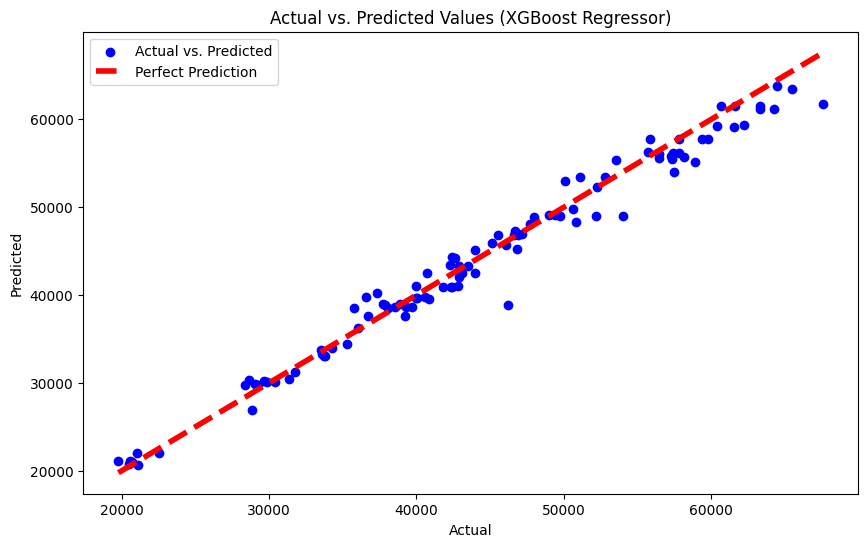

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test["Close"], y_pred_final[0], color='blue', label='Actual vs. Predicted')
plt.plot([y_test["Close"].min(), y_test["Close"].max()], [y_test["Close"].min(), y_test["Close"].max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (XGBoost Regressor)')
plt.legend()
plt.show()

In [78]:
# Print feature importances
feature_importances_xgb = best_xgb_reg.feature_importances_
print("Feature Importances:")
for feature_name, importance in zip(X.columns, feature_importances_xgb):
    print(f"{feature_name}: {importance}")

Feature Importances:
Open: 0.9783591032028198
TextBlob Polarity: 0.006934617180377245
TextBlob Subjectivity: 0.0059019397012889385
VADER Compound Score: 0.00880439393222332


## Combining Feature Importances to get Weighted Avg

In [79]:
# Create individual DataFrames for each model
df_dt = pd.DataFrame({'Model': ['Decision Tree'], 'Open': feature_importances_dt[0],
                      'TextBlob Polarity': feature_importances_dt[1], 'TextBlob Subjectivity': feature_importances_dt[2],
                      'VADER Compound Score': feature_importances_dt[3]})
df_rf = pd.DataFrame({'Model': ['Random Forest'], 'Open': feature_importances_rf[0],
                      'TextBlob Polarity': feature_importances_rf[1], 'TextBlob Subjectivity': feature_importances_rf[2],
                      'VADER Compound Score': feature_importances_rf[3]})
df_gb = pd.DataFrame({'Model': ['Gradient Boosting'], 'Open': feature_importances_gb[0],
                      'TextBlob Polarity': feature_importances_gb[1], 'TextBlob Subjectivity': feature_importances_gb[2],
                      'VADER Compound Score': feature_importances_gb[3]})
df_xgb = pd.DataFrame({'Model': ['XGBoost'], 'Open': feature_importances_xgb[0],
                       'TextBlob Polarity': feature_importances_xgb[1], 'TextBlob Subjectivity': feature_importances_xgb[2],
                       'VADER Compound Score': feature_importances_xgb[3]})

# Concatenate the individual DataFrames
features_df = pd.concat([df_dt, df_rf, df_gb, df_xgb], ignore_index=True)

# Print the combined DataFrame
print(features_df)

               Model      Open  TextBlob Polarity  TextBlob Subjectivity  \
0      Decision Tree  0.998096           0.000507               0.001204   
1      Random Forest  0.994807           0.001215               0.002730   
2  Gradient Boosting  0.997583           0.000934               0.000801   
3            XGBoost  0.978359           0.006935               0.005902   

   VADER Compound Score  
0              0.000193  
1              0.001249  
2              0.000682  
3              0.008804  


In [80]:
features_df

,Model,Open,TextBlob Polarity,TextBlob Subjectivity,VADER Compound Score
0,Decision Tree,0.998096,0.000507,0.001204,0.000193
1,Random Forest,0.994807,0.001215,0.002730,0.001249
2,Gradient Boosting,0.997583,0.000934,0.000801,0.000682
3,XGBoost,0.978359,0.006935,0.005902,0.008804


In [81]:
# Calculate the weighted average for each feature
weighted_avg_open = (features_df['Open'].iloc[0] * mae_test_dt + features_df['Open'].iloc[1] * mae_test_rf +
                     features_df['Open'].iloc[2] * mae_test_gb + features_df['Open'].iloc[3] * mae_test_xgb) / \
                    (mae_test_dt + mae_test_rf + mae_test_gb + mae_test_xgb)

weighted_avg_polarity = (features_df['TextBlob Polarity'].iloc[0] * mae_test_dt + features_df['TextBlob Polarity'].iloc[1] * mae_test_rf +
                         features_df['TextBlob Polarity'].iloc[2] * mae_test_gb + features_df['TextBlob Polarity'].iloc[3] * mae_test_xgb) / \
                        (mae_test_dt + mae_test_rf + mae_test_gb + mae_test_xgb)

weighted_avg_subjectivity = (features_df['TextBlob Subjectivity'].iloc[0] * mae_test_dt + features_df['TextBlob Subjectivity'].iloc[1] * mae_test_rf +
                             features_df['TextBlob Subjectivity'].iloc[2] * mae_test_gb + features_df['TextBlob Subjectivity'].iloc[3] * mae_test_xgb) / \
                            (mae_test_dt + mae_test_rf + mae_test_gb + mae_test_xgb)

weighted_avg_Compound = (features_df['VADER Compound Score'].iloc[0] * mae_test_dt + features_df['VADER Compound Score'].iloc[1] * mae_test_rf +
                         features_df['VADER Compound Score'].iloc[2] * mae_test_gb + features_df['VADER Compound Score'].iloc[3] * mae_test_xgb) /\
                        (mae_test_dt + mae_test_rf + mae_test_gb + mae_test_xgb)

# Create a DataFrame to store the weighted average
weighted_avg_df = pd.DataFrame({'Feature': ['Open', 'polarity', 'subjectivity', 'Compound'],
                                'Weighted_Average': [weighted_avg_open, weighted_avg_polarity,
                                                     weighted_avg_subjectivity, weighted_avg_Compound]})

# Print the weighted average DataFrame
print(weighted_avg_df)

        Feature  Weighted_Average
0          Open          0.992235
1      polarity          0.002394
2  subjectivity          0.002645
3      Compound          0.002726


In [82]:
df1_selected.columns

Index(['TextBlob Polarity', 'TextBlob Subjectivity', 'VADER Compound Score'], dtype='object')

In [83]:
df1_selected.head()

,TextBlob Polarity,TextBlob Subjectivity,VADER Compound Score
0,0.256894,0.550000,-0.791826
1,0.000000,0.000000,0.000000
2,0.000000,0.330000,0.000000
3,0.000000,0.100000,0.402074
4,0.000000,0.344444,0.000000


In [84]:
# Calculate the weighted importance for each feature
df1_selected.loc[:, 'TextBlob Polarity'] *= weighted_avg_polarity
df1_selected.loc[:, 'TextBlob Subjectivity'] *= weighted_avg_subjectivity
df1_selected.loc[:, 'VADER Compound Score'] *= weighted_avg_Compound

In [85]:
# Assuming your DataFrame is named 'df' and you want to save it to a CSV file named 'data.csv'
df1_selected.to_csv('/content/News_Weighted_Sentiments.csv', index=False)
